In [1]:
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='bert-base-uncased'

In [3]:
results = {'acc':[],
           'f1':[],
           'wd':[]}

In [4]:
lr = 1.0e-4
weight_decays = [0.01, 0.1]

for wd in weight_decays:
    print(f'Grid search {model_checkpoint}, learning rate {lr}, wd: {wd}')
    data = ClimateDataset(model_to_train=2,model_checkpoint=model_checkpoint,batch_size=32)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
    trainer = Engine(epochs=20,labels=data.labels)
    trainer.model = model.model
    acc, f1 = trainer.run(lr=lr,
                          wd=wd,
                          train_dataloader=data.train_dataloader,
                          eval_dataloader=data.eval_dataloader,
                          test_dataloader=data.test_dataloader,
                          early_stop=3)
    results['acc'].append(acc)
    results['f1'].append(f1)
    results['wd'].append(wd)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, acc, f1

Grid search bert-base-uncased, learning rate 0.0001, wd: 0.01


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 20: Train Loss:	0.9782	Val Loss:	0.7658	Accuracy:	0.7479	F1:	0.7491
2 / 20: Train Loss:	0.5230	Val Loss:	0.7752	Accuracy:	0.7563	F1:	0.7498
3 / 20: Train Loss:	0.3139	Val Loss:	0.7223	Accuracy:	0.7983	F1:	0.7935
4 / 20: Train Loss:	0.1508	Val Loss:	0.8401	Accuracy:	0.7815	F1:	0.7788
5 / 20: Train Loss:	0.0929	Val Loss:	0.9425	Accuracy:	0.7479	F1:	0.7473
6 / 20: Train Loss:	0.0837	Val Loss:	0.8080	Accuracy:	0.7899	F1:	0.7852
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                    precision    recall  f1-score   support

 misrepresentation       0.79      0.79      0.79        38
oversimplification       0.92      0.64      0.75        36
slothful induction       0.73      0.91      0.81        45

          accuracy                           0.79       119
         macro avg       0.81      0.78      0.79       119
      weighted avg       0.81      0.79      0.79       119

test results:
                    precision    recall  f1

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 20: Train Loss:	0.9753	Val Loss:	0.7801	Accuracy:	0.7059	F1:	0.7090
2 / 20: Train Loss:	0.5243	Val Loss:	0.7743	Accuracy:	0.7395	F1:	0.7312
3 / 20: Train Loss:	0.3100	Val Loss:	0.7222	Accuracy:	0.7899	F1:	0.7858
4 / 20: Train Loss:	0.1662	Val Loss:	0.8401	Accuracy:	0.7731	F1:	0.7727
5 / 20: Train Loss:	0.0939	Val Loss:	0.8558	Accuracy:	0.7479	F1:	0.7444
6 / 20: Train Loss:	0.0917	Val Loss:	0.9505	Accuracy:	0.7395	F1:	0.7300
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                    precision    recall  f1-score   support

 misrepresentation       0.91      0.53      0.67        38
oversimplification       0.72      0.78      0.75        36
slothful induction       0.69      0.89      0.78        45

          accuracy                           0.74       119
         macro avg       0.77      0.73      0.73       119
      weighted avg       0.77      0.74      0.73       119

test results:
                    precision    recall  f1

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

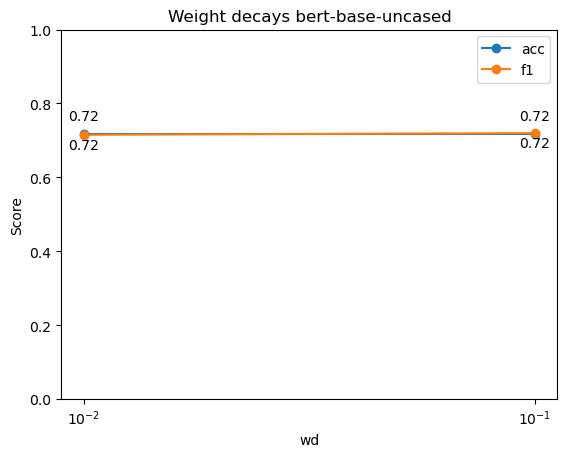

In [6]:
def plot_grid_search(df, title):

    # Create the plot
    ax = df.plot(x='wd', y=['acc', 'f1'], marker='o', linestyle='-')

    # Set y-axis range between 0 and 1
    plt.ylim(0, 1)

    # Annotate points with F1 scores
    for i, row in df.iterrows(): 
        ax.annotate(f'{row["f1"]:.2f}', (row["wd"], row["f1"]), textcoords='offset points', xytext=(0, -10), ha='center')

    # Annotate points with Acc scores
    for i, row in df.iterrows():
        ax.annotate(f'{row["acc"]:.2f}', (row["wd"], row["acc"]), textcoords='offset points', xytext=(0, 10), ha='center')
    
    # 
    plt.xticks(df['wd'], [f'{val:.0e}' for val in df['wd']], ha='center')
    plt.xscale('log')
    plt.minorticks_off()

    plt.title(title)
    plt.xlabel('wd')
    plt.ylabel('Score')
    plt.show()

plot_grid_search(pd.DataFrame(results), f'Weight decays {model_checkpoint}')